In [11]:
import pandas as pd
myecondata=pd.read_json('verma_cat.json')
print(myecondata)

                                             verma_cat
0    Programming & Coding Skills, Econometrics & St...
1    Data Visualization Techniques, Advanced Modeli...
2    Project & Process Management, Presentation & D...
3    Enterprise Systems software, Data Management, ...
4    Enterprise Systems software, Project & Process...
..                                                 ...
517  Data Visualization Techniques, Programming & C...
518                        Programming & Coding Skills
519  Networking & Cloud Computing, Marketing Strate...
520  Data Visualization Techniques, Programming & C...
521      Data Management, Presentation & Documentation

[522 rows x 1 columns]


In [13]:

data = list(myecondata["verma_cat"].apply(lambda x: [item.strip() for item in x.split(",")]))
data

[['Programming & Coding Skills',
  'Econometrics & Statistics',
  'Data Management',
  'Mathematics'],
 ['Data Visualization Techniques',
  'Advanced Modeling & Analytics',
  'Financial Analysis & Management',
  'Accounting'],
 ['Project & Process Management',
  'Presentation & Documentation',
  'Policy Analysis and Development'],
 ['Enterprise Systems software',
  'Data Management',
  'Presentation & Documentation',
  'Financial Analysis & Management'],
 ['Enterprise Systems software',
  'Project & Process Management',
  'Advanced Modeling & Analytics',
  'Econometrics & Statistics',
  'Data Management',
  'Presentation & Documentation',
  'Financial Analysis & Management'],
 ['Programming & Coding Skills',
  'Econometrics & Statistics',
  'Mathematics',
  'Presentation & Documentation',
  'Financial Analysis & Management',
  'Policy Analysis and Development'],
 ['Programming & Coding Skills',
  'Project & Process Management',
  'Advanced Modeling & Analytics',
  'Data Collection & Ac

In [15]:
#Let's transform the list, with one-hot encoding
from mlxtend.preprocessing import TransactionEncoder
a = TransactionEncoder()
a_data = a.fit(data).transform(data)
df = pd.DataFrame(a_data,columns=a.columns_)
df = df.replace(False,0)
df = df.replace(True,1)

df

C:\Users\mojga\AppData\Local\Temp\ipykernel_10340\579372010.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace(True,1)


,,Accounting,Advanced Modeling & Analytics,Business Strategy & Management,Communication,Consulting,Data Collection & Acquisition,Data Management,Data Visualization Techniques,Econometrics & Statistics,...,Other Business Domain,Other Digital skills,Policy Analysis and Development,Presentation & Documentation,Programming & Coding Skills,Project & Process Management,Real Estate,Research Methodologies,Sustainability,Web Scraping
0,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0
1,0,1,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,1,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,1,0,0,0,0,1,0,1,...,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,0,0,1,0,0,0,0,1,1,1,...,0,1,0,1,1,1,0,0,0,0
518,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
519,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
520,0,0,1,1,0,0,0,1,1,1,...,0,0,0,0,1,0,0,0,0,0


# Applying Apriori and Resulting

In [18]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules


# Apply Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(df, min_support=0.1, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.5, num_itemsets=2)

# Display the association rules
print("Association Rules:")
print(rules)

Association Rules:
                                          antecedents  \
0                     (Advanced Modeling & Analytics)   
1                     (Advanced Modeling & Analytics)   
2                     (Data Visualization Techniques)   
3                         (Econometrics & Statistics)   
4                       (Enterprise Systems software)   
5                   (Financial Analysis & Management)   
6                                   (Data Management)   
7                      (Presentation & Documentation)   
8                       (Programming & Coding Skills)   
9                     (Data Visualization Techniques)   
10                        (Econometrics & Statistics)   
11                      (Enterprise Systems software)   
12                  (Financial Analysis & Management)   
13                     (Project & Process Management)   
14   (Data Management, Advanced Modeling & Analytics)   
15  (Presentation & Documentation, Advanced Modeli...   
16     (Data

C:\Users\mojga\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


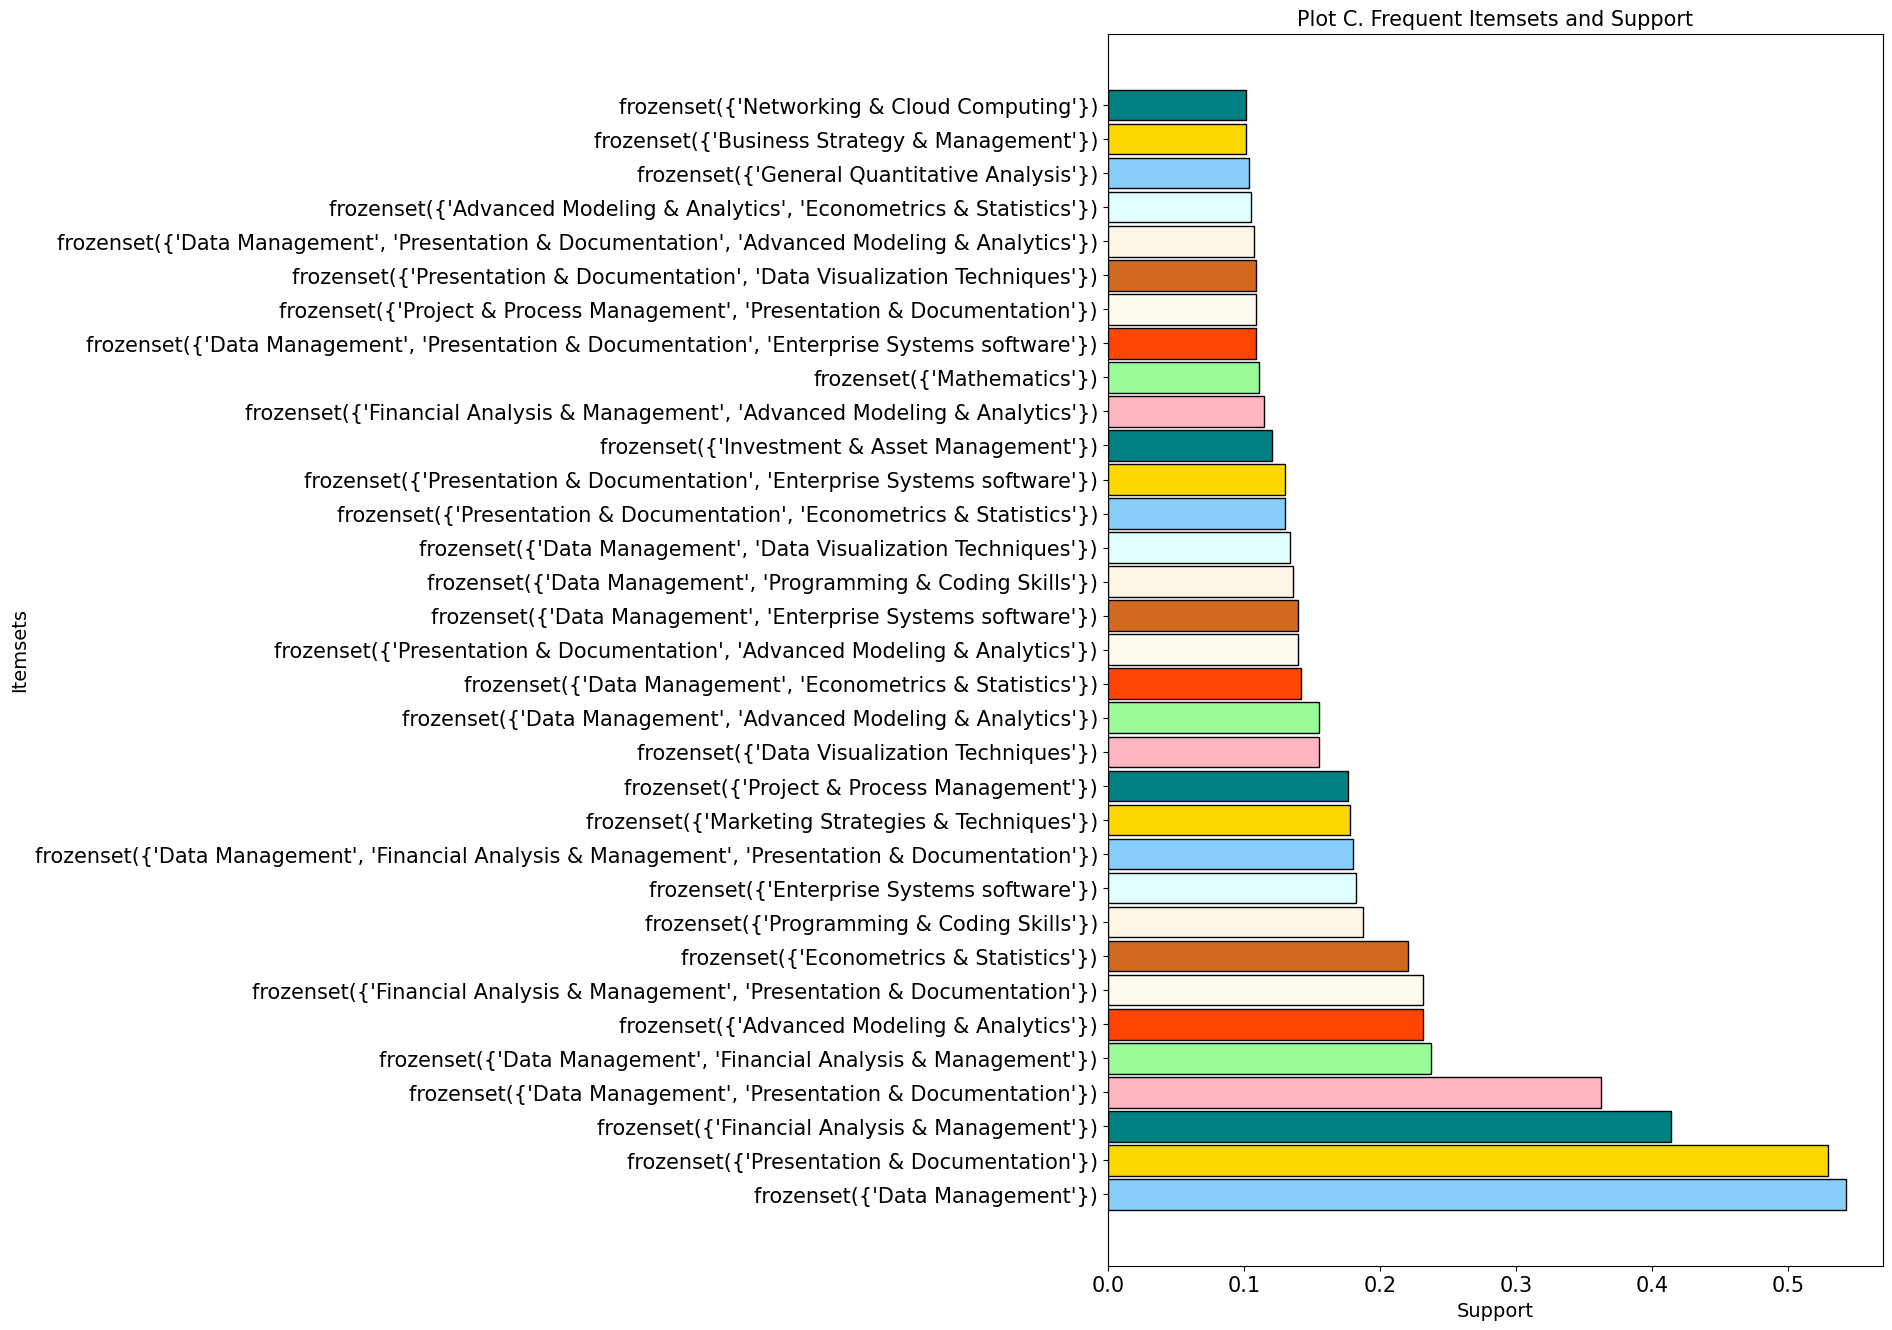

In [20]:
import matplotlib.pyplot as plt

# Sort the frequent_itemsets DataFrame by 'support' in descending order
sorted_frequent_itemsets = frequent_itemsets.sort_values(by='support', ascending=False)

# Define a list of colors for each bar (as provided in your code)
colors = ['lightskyblue', 'gold',  'teal', 'lightpink', 'palegreen', 'orangered',   'floralwhite', 'chocolate', 'oldlace', 'lightcyan']

# Plotting the frequent itemsets with their support
plt.figure(figsize=(10, 16))
bar_width = 0.9
plt.barh(range(len(sorted_frequent_itemsets)), sorted_frequent_itemsets['support'], tick_label=sorted_frequent_itemsets['itemsets'], color=colors, edgecolor='black', height=bar_width)
plt.xlabel('Support', fontsize=14)
plt.ylabel('Itemsets', fontsize=14)
plt.title('Plot C. Frequent Itemsets and Support', fontsize=15)

plt.tick_params(axis='y', labelsize=15) 
plt.tick_params(axis='x', labelsize=15) 
plt.savefig('frequent_itemsets_plot.png', dpi=300, bbox_inches='tight')

plt.show()